Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


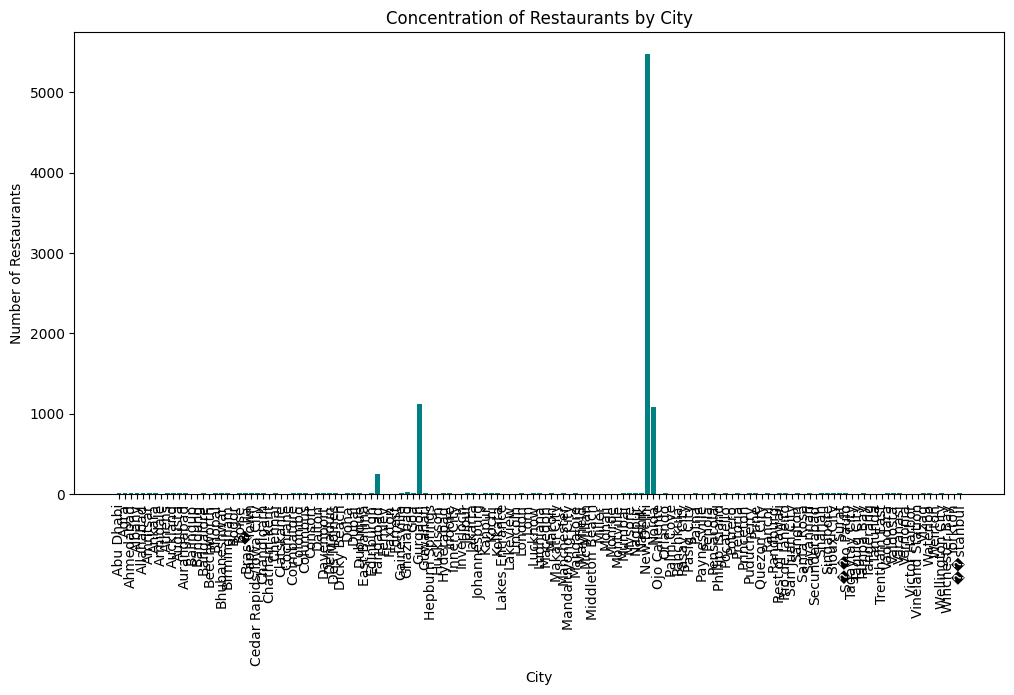

Top 5 cities with highest number of restaurants:
         City  total_restaurants  avg_rating  avg_cost_for_two
88  New Delhi               5473    2.438845        596.088069
50    Gurgaon               1118    2.651431        714.016100
89      Noida               1080    2.036204        539.490741
43  Faridabad                251    1.866932        447.609562
48  Ghaziabad                 25    2.852000        602.000000
City-wise statistics (Ratings, Cost, Cuisine count):
                  avg_rating  avg_cost_for_two  cuisine_count
City                                                         
Inner City          4.900000       1120.000000              2
Quezon City         4.800000        800.000000              1
Makati City         4.650000       1150.000000              2
Pasig City          4.633333        933.333333              3
Mandaluyong City    4.625000       2000.000000              4
Beechworth          4.600000         20.000000              1
London              4.53

In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '/content/Dataset .csv'  # Adjust the file path if needed
data = pd.read_csv(file_path)

# Step 2: Inspect the dataset for relevant columns
# We need columns like 'Latitude', 'Longitude', 'City', 'Aggregate rating', 'Average Cost for two'
# If the dataset has latitude/longitude data, proceed with geographic analysis
print(data.columns)

# Step 3: Clean the data
# Drop rows with missing latitude or longitude
geo_data = data.dropna(subset=['Latitude', 'Longitude'])

# Step 4: Map Visualization using Folium
# Initialize a map centered on an average latitude and longitude (you can adjust this based on your dataset)
map_center = [geo_data['Latitude'].mean(), geo_data['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=10)

# Add restaurants to the map using a MarkerCluster to handle large volumes of points
marker_cluster = MarkerCluster().add_to(restaurant_map)

for idx, row in geo_data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"Restaurant: {row['Restaurant Name']}<br>City: {row['City']}<br>Rating: {row['Aggregate rating']}").add_to(marker_cluster)

# Save the map to an HTML file
restaurant_map.save("restaurants_map.html")

# Step 5: Group restaurants by City and analyze concentration
city_group = geo_data.groupby('City').agg(
    total_restaurants=('Restaurant Name', 'count'),
    avg_rating=('Aggregate rating', 'mean'),
    avg_cost_for_two=('Average Cost for two', 'mean')
).reset_index()

# Step 6: Visualize concentration of restaurants by city
plt.figure(figsize=(12, 6))
plt.bar(city_group['City'], city_group['total_restaurants'], color='teal')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.title('Concentration of Restaurants by City')
plt.show()

# Step 7: Explore the top 5 cities with the highest concentration of restaurants
top_cities = city_group.nlargest(5, 'total_restaurants')
print("Top 5 cities with highest number of restaurants:")
print(top_cities)

# Step 8: Calculate statistics (average ratings, average cost) by City
city_stats = geo_data.groupby('City').agg(
    avg_rating=('Aggregate rating', 'mean'),
    avg_cost_for_two=('Average Cost for two', 'mean'),
    cuisine_count=('Cuisines', 'nunique')
).sort_values(by='avg_rating', ascending=False)

print("City-wise statistics (Ratings, Cost, Cuisine count):")
print(city_stats.head(10))  # Display top 10 cities by average rating

# Step 9: Identify interesting patterns
# Example: Explore cities/localities with high ratings and unique cuisine varieties


In [4]:
import pandas as pd

# Step 1: Load the dataset
file_path = '/content/Dataset .csv'  # Adjust the file path if needed
data = pd.read_csv(file_path)

# Step 2: Inspect the data for relevant columns (City, Restaurant Name, Rating, etc.)
print(data.columns)

# Step 3: Get user input for city
user_city = input("Enter your city: ")

# Step 4: Filter the data based on the user's city
restaurants_in_city = data[data['City'].str.lower() == user_city.lower()]

# Step 5: Check if any restaurants are found in the city
if restaurants_in_city.empty:
    print(f"No restaurants found in {user_city}. Please try another city.")
else:
    # Step 6: Sort restaurants by rating or other criteria
    top_restaurants = restaurants_in_city.sort_values(by='Aggregate rating', ascending=False).head(10)

    # Step 7: Display the top 10 restaurants in the city
    print(f"\nTop 10 restaurants in {user_city}:")
    for index, row in top_restaurants.iterrows():
        print(f"Restaurant: {row['Restaurant Name']}, Rating: {row['Aggregate rating']}, Price for two: {row['Average Cost for two']}, Cuisine: {row['Cuisines']}")


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Enter your city: New Delhi

Top 10 restaurants in New Delhi:
Restaurant: Naturals Ice Cream, Rating: 4.9, Price for two: 150, Cuisine: Ice Cream
Restaurant: Indian Accent - The Manor, Rating: 4.9, Price for two: 4000, Cuisine: Modern Indian
Restaurant: Masala Library, Rating: 4.9, Price for two: 5000, Cuisine: Modern Indian
Restaurant: Kopper Kadai, Rating: 4.8, Price for two: 1400, Cuisine: North Indian
Restaurant: MOB Brewpub, Rating: 4.7, Price for two: 1500, Cuisine: Continental, Italian, Asian, Indian
Restaurant: Naturals Ice Cream, Rating: 4.7, Price for two: 150, Cuisine: Ice Cream

In [9]:
import pickle

In [11]:
pickle.dump(city_stats , open('Location_based_Analysis.pkl', 'wb'))